Importing the required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



load The dataset

In [20]:
df = pd.read_csv("2021 New Coder Survey.csv",low_memory=False)
print(df.head())

           Timestamp 1. What is your biggest reason for learning to code?  \
0  7/1/2021 10:10:23                       To succeed in current career     
1  7/1/2021 10:31:01                                  To change careers     
2  7/1/2021 10:42:31                                  To change careers     
3  7/1/2021 11:06:43                                         As a hobby     
4  7/1/2021 11:14:31                         To start your first career     

  2. What methods have you used to learn about coding? Please select all that apply.  \
0  Online resources, Books, In-person bootcamps, ...                                   
1          Online resources, Books, Online bootcamps                                   
2  Online resources, Books, Hackathons, Meetup.co...                                   
3                            Online resources, Books                                   
4          Online resources, Books, Online bootcamps                                   

  3. Whi

Printing Column Names with Indices


In [5]:
for i, col in enumerate(df.columns):
    print(f'{i}: "{col}"')


0: "Timestamp"
1: "1. What is your biggest reason for learning to code?"
2: "2. What methods have you used to learn about coding? Please select all that apply."
3: "3. Which online learning resources have you found helpful? Please select all that apply."
4: "4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply."
5: "5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply."
6: "6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply."
7: "7. About how many hours do you spend learning each week?"
8: "8. About how many months have you been programming?"
9: "9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?"
10: "10. Are you already employed in a software development job?"
11: "11. If you are already employed as a d

Checking for Missing Values in Relevant Columns

In [6]:
df.columns = df.columns.str.strip()
income_column = '22. About how much money did you earn last year from any job or employment (in US Dollars)?'
podcast_column = '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.'
missing_income = df[income_column].isnull().sum()
missing_podcast = df[podcast_column].isnull().sum()
print(f"Missing values in income column: {missing_income}")
print(f"Missing values in podcast column: {missing_podcast}")
unique_income_values = df[income_column].unique()
print(f"Unique values in income column: {unique_income_values}")

Missing values in income column: 7979
Missing values in podcast column: 1536
Unique values in income column: [nan 'Under $1,000' '$40,000 to $49,999' '$75,000 to $89,999'
 '$60,000 to $74,999' '$1,000 to $2,999' '$10,000 to $14,999'
 '$20,000 to $24,999' '$35,000 to $39,999' '$25,000 to $29,999'
 '$30,000 to $34,999' '$3,000 to $4,999' '$50,000 to $59,999'
 '$15,000 to $19,999' '$7,000 to $9,999' '$90,000 to $119,999'
 '$5,000 to $6,999' '$120,000 to $159,999' "I don't want to answer"
 '$200,000 to $249,999' '$250,000 or over' 'I don’t know'
 '$160,000 to $199,999']


Drop Rows with Missing Values and Convert Income to Numeric

In [7]:
df[income_column] = df[income_column].astype(str)
df[income_column] = df[income_column].str.replace(r'[^0-9]', '', regex=True)
df[income_column] = pd.to_numeric(df[income_column], errors='coerce')
missing_income = df[income_column].isnull().sum()
print(f"Missing values in income column after conversion: {missing_income}")


Missing values in income column after conversion: 8161


Cleaned data

In [8]:
df_clean = df.dropna(subset=[income_column, podcast_column])
print(f"Shape after dropping rows with missing values: {df_clean.shape}")
print(df_clean.head())

Shape after dropping rows with missing values: (9272, 63)
           Timestamp 1. What is your biggest reason for learning to code?  \
1  7/1/2021 10:31:01                                  To change careers     
4  7/1/2021 11:14:31                         To start your first career     
5  7/1/2021 11:17:08                       To succeed in current career     
6  7/1/2021 11:21:26                         To start your first career     
7  7/1/2021 11:24:57                                         As a hobby     

  2. What methods have you used to learn about coding? Please select all that apply.  \
1          Online resources, Books, Online bootcamps                                   
4          Online resources, Books, Online bootcamps                                   
5               Online resources, Books, Conferences                                   
6  Online resources, In-person bootcamps, Meetup....                                   
7  Online resources, Hackathons, Worksh

Encode Categorical Features and Standardize Data

In [9]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_clean[[podcast_column]]).toarray()
X = np.hstack((df_clean[[income_column]].values.reshape(-1, 1), encoded_features))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Determining the Optimal Number of Clusters

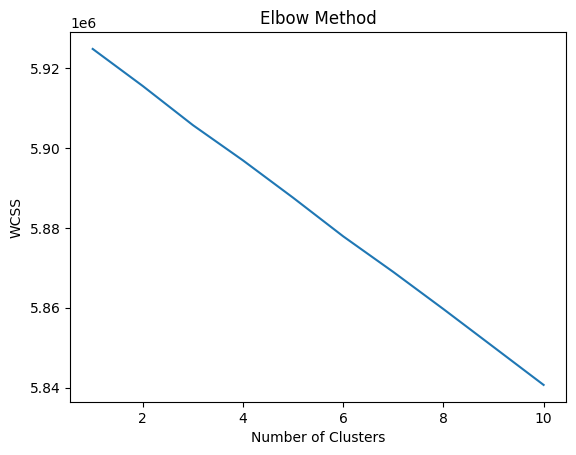

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Applying K-Means Clustering

In [13]:

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)
df_clean.loc[:, 'Cluster'] = y_kmeans
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
cluster_analysis = df_clean.groupby('Cluster')[numeric_columns].mean()
print(cluster_analysis)

         7. About how many hours do you spend learning each week?  \
Cluster                                                             
0                                                16.000000          
1                                                11.962780          
2                                                12.331707          

         22. About how much money did you earn last year from any job or employment (in US Dollars)?  \
Cluster                                                                                                
0                                             6.000075e+09                                             
1                                             6.730053e+09                                             
2                                             7.680273e+09                                             

         23. How old are you?  \
Cluster                         
0                   27.000000   
1                   30.559551   
2

Now Implementing Classification by creating New Feature for High/Low Income

In [15]:
income_column = '22. About how much money did you earn last year from any job or employment (in US Dollars)?'
df[income_column] = df[income_column].astype(str)
df[income_column] = df[income_column].str.replace(r'[^0-9]', '', regex=True)
df[income_column] = pd.to_numeric(df[income_column], errors='coerce')
income_threshold = 30000
df['income_label'] = (df[income_column] >= income_threshold).astype(int)
df['income_label'].value_counts()



income_label
0    9770
1    8356
Name: count, dtype: int64

 Feature Selection

In [16]:
selected_features = [
    '7. About how many hours do you spend learning each week?',
    '8. About how many months have you been programming?',
    '10. Are you already employed in a software development job?',
    '20. Regarding employment status, are you currently....',
    '23. How old are you?',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Benefits]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload]'
]
df_clean = df.dropna(subset=selected_features + ['income_label'])
df_encoded = pd.get_dummies(df_clean[selected_features], drop_first=True)
X = df_encoded
y = df_clean['income_label']
X = X.fillna(X.mean())
X.shape, y.shape

((11006, 590), (11006,))

 Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Training

In [18]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [19]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72      1222
           1       0.82      0.90      0.86      2080

    accuracy                           0.81      3302
   macro avg       0.80      0.78      0.79      3302
weighted avg       0.81      0.81      0.81      3302

